# Solo Project Signal Analysis
## Anna Bernbaum
### 2019

In [162]:
import wave
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os as os
from scipy.signal import hilbert
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

## Defining Functions and Constants

In [141]:
fs = 44100  # Sampling frequency

def import_data(filepath):
    """Import a signal from a .wav file as an array"""

    data = wave.open(filepath)
    # Extract Raw Audio from Wav File
    signal = data.readframes(-1)
    signal = np.fromstring(signal, 'Int16')
    name = os.path.basename(filepath)
    return signal, name

def basic_plot(signal, name):
    time_values = np.arange(0,(len(signal))/fs, 1/fs)  # convert from smaple number to time
    plt.title(name)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude Normalised')
    plt.plot(time_values, signal)
    plt.show()

## Import Data

In [142]:
# Load in data to pandas dataframe
filepaths = ['WAV_files/DPA_tests1/DPA_breathing1.wav',
             'WAV_files/DPA_tests1/DPA_breathing2.wav',
             'WAV_files/DPA_tests1/DPA_breathing3.wav',
             'WAV_files/DPA_tests1/DPA_forced_breathing1.wav',
             'WAV_files/DPA_tests1/DPA_forced_breathing2.wav',
             'WAV_files/DPA_tests1/DPA_forced_breathing3.wav',
             'WAV_files/DPA_tests1/DPA_cough1.wav',
             'WAV_files/DPA_tests1/DPA_cough2.wav',
             'WAV_files/DPA_tests1/DPA_cough3.wav',
             'WAV_files/DPA_tests1/DPA_wheeze1.wav',
             'WAV_files/DPA_tests1/DPA_wheeze2.wav',
             'WAV_files/DPA_tests1/DPA_wheeze3.wav',
             'WAV_files/DPA_stethescope_tests1/DPA_stethescope_breathing1.wav',
             'WAV_files/DPA_stethescope_tests1/DPA_stethescope_breathing2.wav',
             'WAV_files/DPA_stethescope_tests1/DPA_stethescope_breathing3.wav',
             'WAV_files/DPA_stethescope_tests1/DPA_stethescope_forced_breathing1.wav',
             'WAV_files/DPA_stethescope_tests1/DPA_stethescope_forced_breathing2.wav',
             'WAV_files/DPA_stethescope_tests1/DPA_stethescope_forced_breathing3.wav',
             'WAV_files/DPA_stethescope_tests1/DPA_stethescope_cough1.wav',
             'WAV_files/DPA_stethescope_tests1/DPA_stethescope_wheeze1.wav',
             'WAV_files/Cducer_tests1/Cducer_breathing1.wav',
             'WAV_files/Cducer_tests1/Cducer_breathing2.wav',
             'WAV_files/Cducer_tests1/Cducer_breathing3.wav',
             'WAV_files/Cducer_tests1/Cducer_forced_breathing1.wav',
             'WAV_files/Cducer_tests1/Cducer_forced_breathing2.wav',
             'WAV_files/Cducer_tests1/Cducer_forced_breathing3.wav',
             'WAV_files/Cducer_tests1/Cducer_cough1.wav',
             'WAV_files/Cducer_tests1/Cducer_cough2.wav',
             'WAV_files/Cducer_tests1/Cducer_cough3.wav',
             ]

df = pd.DataFrame()  # create empty dataframe

# import data for every file of collected data
for file in filepaths:
    signal, name = import_data(file)
    df[name] = pd.Series(signal)  # append signal to new column in pandas df

/Users/annabernbaum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':
/Users/annabernbaum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


## Plot the signal 

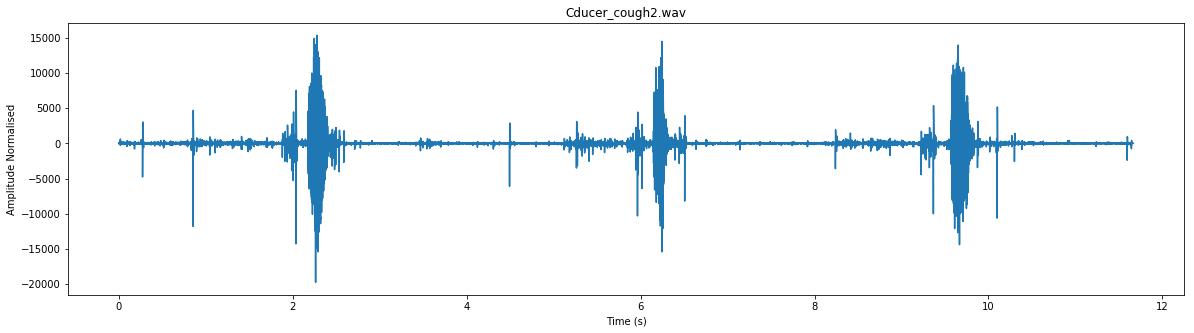

In [143]:
# Basic Plotting
signal = (df['Cducer_cough2.wav'])  # Change this to the desired signal to plot
basic_plot(signal, 'Cducer_cough2.wav')

## Outlier Handling
### Identify Outliers

In [144]:
# Remove outliers
window = int(0.05 * fs)  # window size in sample number
threshold = 8000

# https://ocefpaf.github.io/python4oceanographers/blog/2015/03/16/outlier_detection/
df['median'] = df['DPA_stethescope_forced_breathing1.wav'].rolling(window).median()
difference = np.abs(df['DPA_stethescope_forced_breathing1.wav'] - df['median'])
outlier_idx = difference > threshold

### Plot Outliers

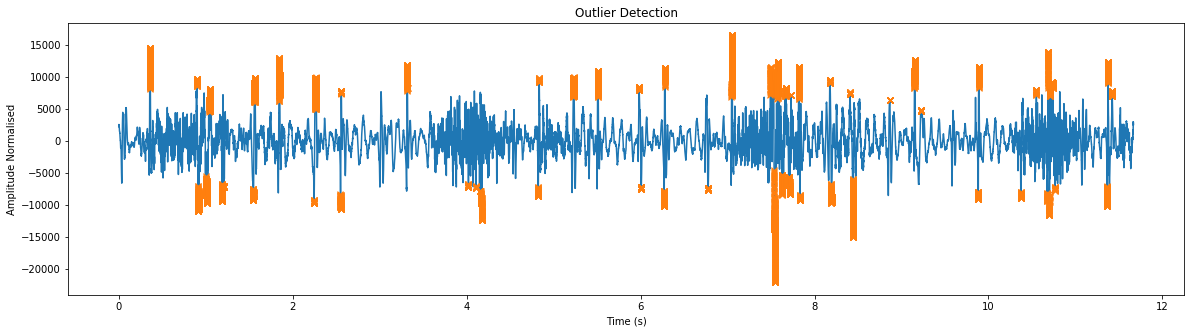

In [145]:
# Plot outliers
time_values = np.arange(0, (len(df['DPA_stethescope_forced_breathing1.wav'])) / fs, 1 / fs)  # convert from sample number to time
plt.figure(1)
plt.title('Outlier Detection')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude Normalised')
plt.plot(time_values, df['DPA_stethescope_forced_breathing1.wav'])
plt.plot(time_values[outlier_idx], df['DPA_stethescope_forced_breathing1.wav'][outlier_idx], 'x')
plt.show()

### Remove Outliers

In [150]:
# remove points either side of outliers

# create duplicate column for editing
df['RemovedOutliers'] = df['DPA_stethescope_forced_breathing1.wav']

removal_length = 1000

for i in np.arange(0, len(df['RemovedOutliers'])):
    if outlier_idx[i] == True:
        current = df['RemovedOutliers'][i]
        replace_range = df['RemovedOutliers'][i-removal_length : i+removal_length]
        # df['RemovedOutliers'].replace(current, np.nan)
        # print('outliers')
        if len(df['RemovedOutliers']) - i > len(replace_range): # if theres enough space
            df['RemovedOutliers'].loc[i-removal_length:i+removal_length] = np.nan
    else:
        pass

### Plot the data with removed outliers

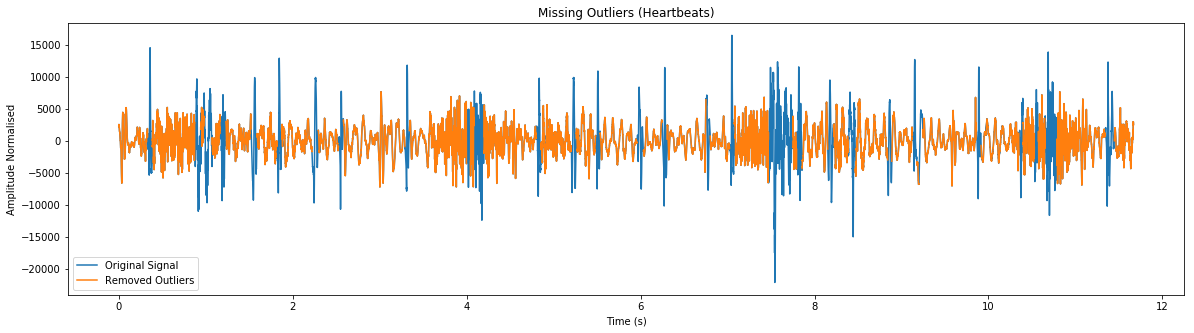

In [151]:
time_values = np.arange(0,(len(df['RemovedOutliers']))/fs, 1/fs)  # convert from smaple number to time
plt.title('Missing Outliers (Heartbeats)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude Normalised')
plt.plot(time_values, df['DPA_stethescope_forced_breathing1.wav'])
plt.plot(time_values, df['RemovedOutliers'])
plt.legend(['Original Signal', 'Removed Outliers'], loc='lower left')
plt.show()

### Interpolate Data Gaps

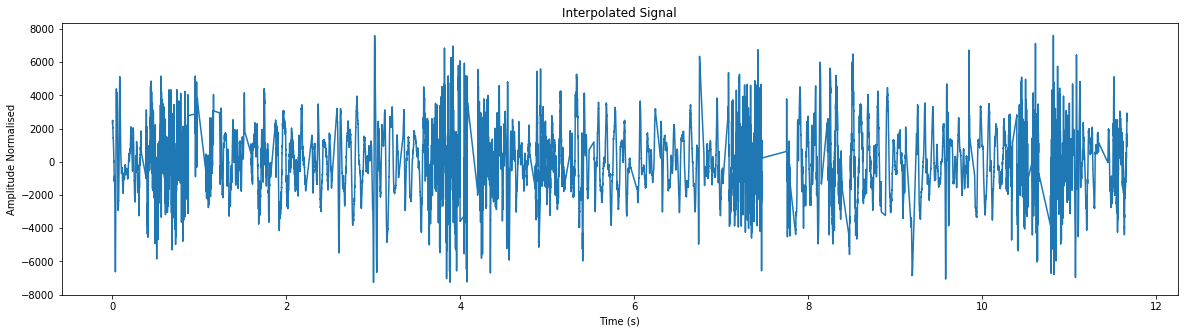

In [152]:
# interpolate gaps
df['RemovedOutliers'] = df['RemovedOutliers'].interpolate(method = 'linear')


# plot interpolated results
basic_plot(df['RemovedOutliers'], 'Interpolated Signal')

## Plot Spectrogram

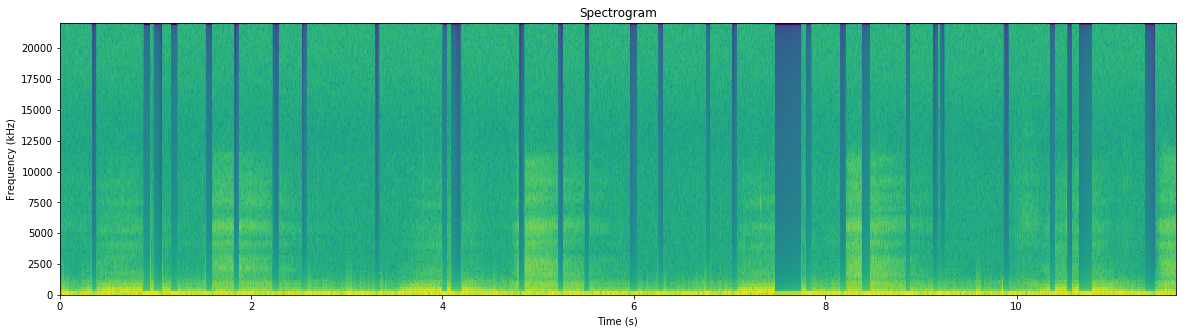

In [153]:
plt.specgram(df['RemovedOutliers'], Fs=fs)
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.show()

## Plot RMS

UNFINISHED

514459


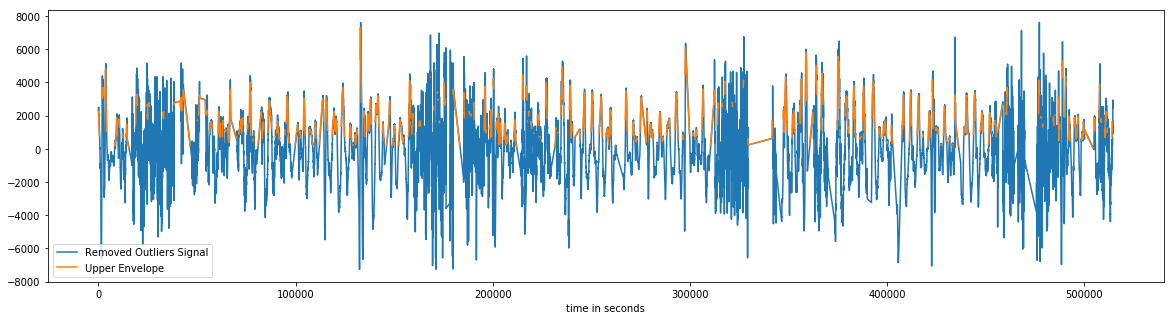

In [161]:
# analytic_signal = hilbert(df['RemovedOutliers'])
# amplitude_envelope = np.abs(analytic_signal)

def window_rms(inputSignal, window_size):
    a2 = np.power(inputSignal,2)
    window = np.ones(window_size)/float(window_size)
    return np.sqrt(np.convolve(a2, window, 'valid'))

# upper_values = abs(df['RemovedOutliers'])
# upper = df['RemovedOutliers'][df['RemovedOutliers'] > 0]
upper = df['RemovedOutliers'].copy()
upper[upper < 0] = np.nan
# lower = df['RemovedOutliers'][df['RemovedOutliers'] < 0]


print(len(upper))

upper_envelope = window_rms(upper,300) ##envolvente Rms (second parameter is windows size)
# lower_envelope = window_rms(lower,6000) ##envolvente Rms (second parameter is windows size)

plt.plot(df['RemovedOutliers'])
plt.plot(upper_envelope)
# plt.plot(lower_envelope)
plt.xlabel("time in seconds")
plt.legend(['Removed Outliers Signal', 'Upper Envelope'], loc='lower left')
plt.show()